# Price Prediction and Variable Importance Visualization using Random Forests

## About Data
Copyright (c) 2020 Abhijeeth    
 (Licensed under CC BY 0）https://creativecommons.org/share-your-work/public-domain/cc0  
  
[Fruit and Vegetable Prices(kaggle)](https://www.kaggle.com/datasets/vstacknocopyright/fruit-and-vegetable-prices)

## About Code
This code aims to estimate the price of fruits and vegetables from their measurements using Random Forest.    
Also, In this code visualizes the importance of variables.

In [3]:
import warnings
warnings.simplefilter('ignore')

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import zip_longest
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.inspection import permutation_importance
from sklearn.inspection import partial_dependence
import shap

In [5]:
%matplotlib inline
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.minor.visible'] = False
plt.rcParams['ytick.minor.visible'] = False

In [15]:
df = pd.read_csv('../Data/Fruit_Prices_2020.csv')
df

,Fruit,Form,RetailPrice,RetailPriceUnit,Yield,CupEquivalentSize,CupEquivalentUnit,CupEquivalentPrice
0,Apples,Fresh,1.5193,per pound,0.90,0.2425,pounds,0.4094
1,"Apples, applesauce",Canned,1.0660,per pound,1.00,0.5401,pounds,0.5758
2,"Apples, ready-to-drink",Juice,0.7804,per pint,1.00,8.0000,fluid ounces,0.3902
3,"Apples, frozen concentrate",Juice,0.5853,per pint,1.00,8.0000,fluid ounces,0.2926
4,Apricots,Fresh,2.9665,per pound,0.93,0.3638,pounds,1.1603
...,...,...,...,...,...,...,...,...
57,Raspberries,Fresh,6.6391,per pound,0.96,0.3197,pounds,2.2107
58,Raspberries,Frozen,4.1877,per pound,1.00,0.3307,pounds,1.3849
59,Strawberries,Fresh,2.5800,per pound,0.94,0.3197,pounds,0.8774
60,Strawberries,Frozen,2.8189,per pound,1.00,0.3307,pounds,0.9322


In [16]:
df.insert(1, 'Fruit_Id', pd.factorize(df['Fruit'])[0])
df.drop('Fruit',axis=1,inplace=True)
df.insert(2, 'Form_Id', pd.factorize(df['Form'])[0])
df.drop('Form',axis=1,inplace=True)
df.insert(4, 'RetailPriceUnit_Id', pd.factorize(df['RetailPriceUnit'])[0])
df.drop('RetailPriceUnit',axis=1,inplace=True)
df.insert(7, 'CupEquivalentUnit_Id', pd.factorize(df['CupEquivalentUnit'])[0])
df.drop('CupEquivalentUnit',axis=1,inplace=True)
df

,Fruit_Id,Form_Id,RetailPrice,RetailPriceUnit_Id,Yield,CupEquivalentSize,CupEquivalentUnit_Id,CupEquivalentPrice
0,0,0,1.5193,0,0.90,0.2425,0,0.4094
1,1,1,1.0660,0,1.00,0.5401,0,0.5758
2,2,2,0.7804,1,1.00,8.0000,1,0.3902
3,3,2,0.5853,1,1.00,8.0000,1,0.2926
4,4,0,2.9665,0,0.93,0.3638,0,1.1603
...,...,...,...,...,...,...,...,...
57,50,0,6.6391,0,0.96,0.3197,0,2.2107
58,50,4,4.1877,0,1.00,0.3307,0,1.3849
59,51,0,2.5800,0,0.94,0.3197,0,0.8774
60,51,4,2.8189,0,1.00,0.3307,0,0.9322


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Fruit_Id              62 non-null     int64  
 1   Form_Id               62 non-null     int64  
 2   RetailPrice           62 non-null     float64
 3   RetailPriceUnit_Id    62 non-null     int64  
 4   Yield                 62 non-null     float64
 5   CupEquivalentSize     62 non-null     float64
 6   CupEquivalentUnit_Id  62 non-null     int64  
 7   CupEquivalentPrice    62 non-null     float64
dtypes: float64(4), int64(4)
memory usage: 4.0 KB


### Investigating Missing Values

In [18]:
print('Is there any NaN value in the dataset: ', df.isnull().values.any())

Is there any NaN value in the dataset:  False


### Correlation of the Variables

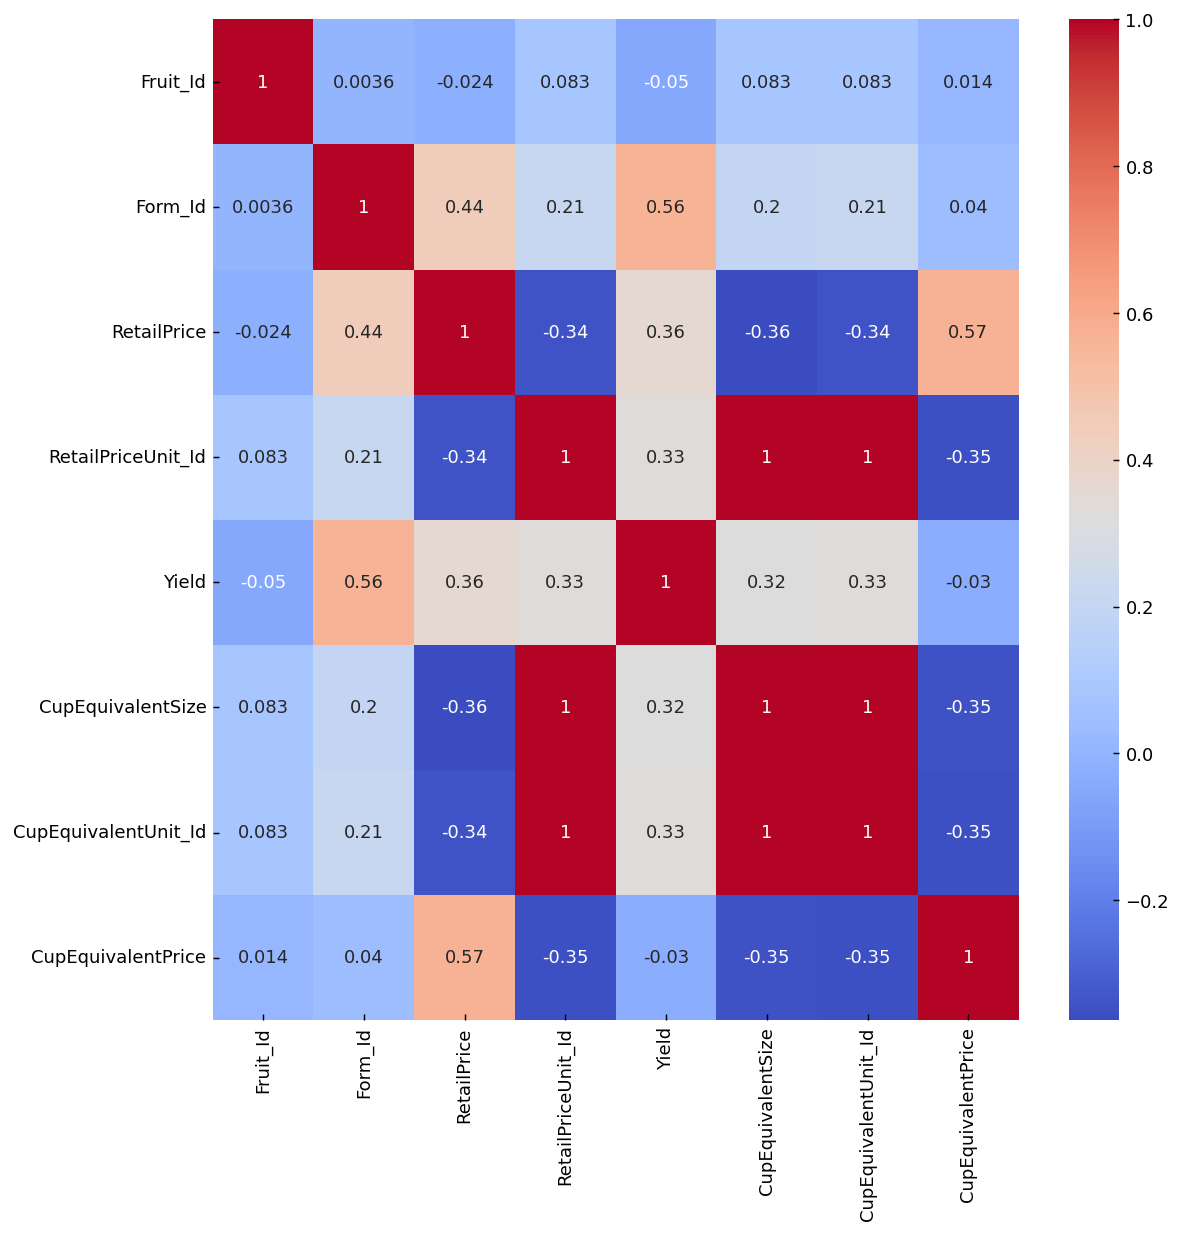

In [21]:
fig, ax = plt.subplots(figsize=(10,10),dpi=130)
sns.heatmap(df.corr(), ax=ax, annot=True, cmap='coolwarm')
fig.show()

### Preparing the Random Forest modeling

In [22]:
X = df.drop('RetailPrice', axis=1)
y = df['RetailPrice']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=314)

In [24]:
forest = RandomForestRegressor()

### Predictions

In [25]:
forest.fit(X_train, y_train)

RandomForestRegressor()

In [26]:
y_test_pred = forest.predict(X_test)

### Analysing the results of the Model from Train Dataset and Predictions

In [27]:
print('R2 : ', r2_score(y_test, y_test_pred))
print('MAE : ',mean_absolute_error(y_test, y_test_pred))
print('RMSE : ',np.sqrt(mean_squared_error(y_test, y_test_pred)))

R2 :  0.9585912772110428
MAE :  0.33533676923076927
RMSE :  0.41987950128688495


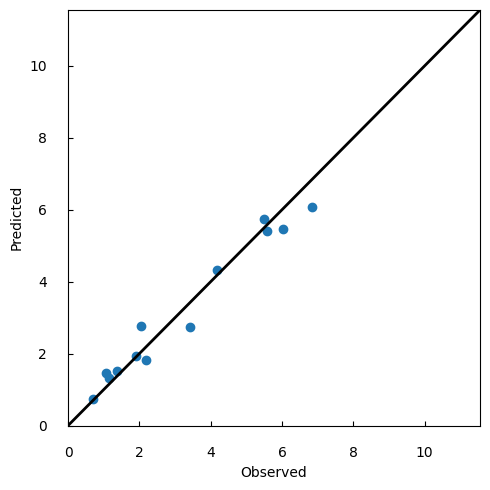

In [29]:
disp_min = 0
disp_max = y.max() + 1
fig, ax = plt.subplots(figsize=(5, 5))
ax.scatter(y_test, y_test_pred)
ax.plot([disp_min, disp_max], [disp_min, disp_max], color='black', linewidth=2.0)
ax.set_xlim(disp_min, disp_max)
ax.set_ylim(disp_min, disp_max)
ax.set_xlabel('Observed')
ax.set_ylabel('Predicted')
ax.tick_params(pad=15)
fig.tight_layout()
fig.show()

### Variable Importance Visualization

#### Permutation Feature Importance

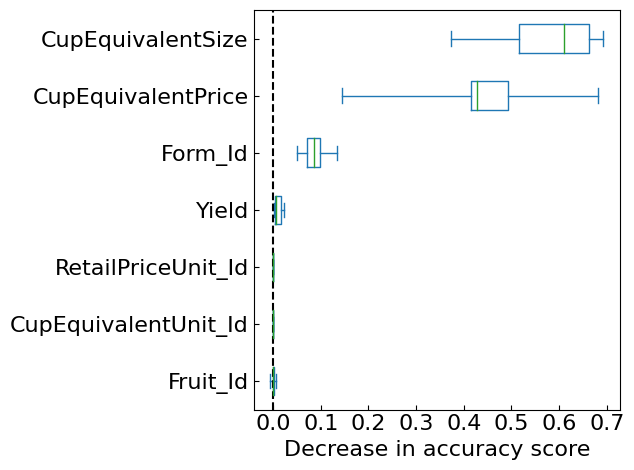

In [30]:
result = permutation_importance(forest, X_test, y_test, n_repeats=10, random_state=314)
sorted_importances_idx = result.importances_mean.argsort()
importances = pd.DataFrame(result.importances[sorted_importances_idx].T,
                        columns=X_test.columns[sorted_importances_idx],)
ax = importances.plot.box(vert=False, whis=10,fontsize=16)
ax.axvline(x=0, color='k', linestyle='--')
ax.set_xlabel('Decrease in accuracy score',fontsize=16)
ax.figure.tight_layout()
plt.show()
plt.clf()
plt.close()

#### Partial Dependence (PD) and Individual Conditional Expectation (ICE)

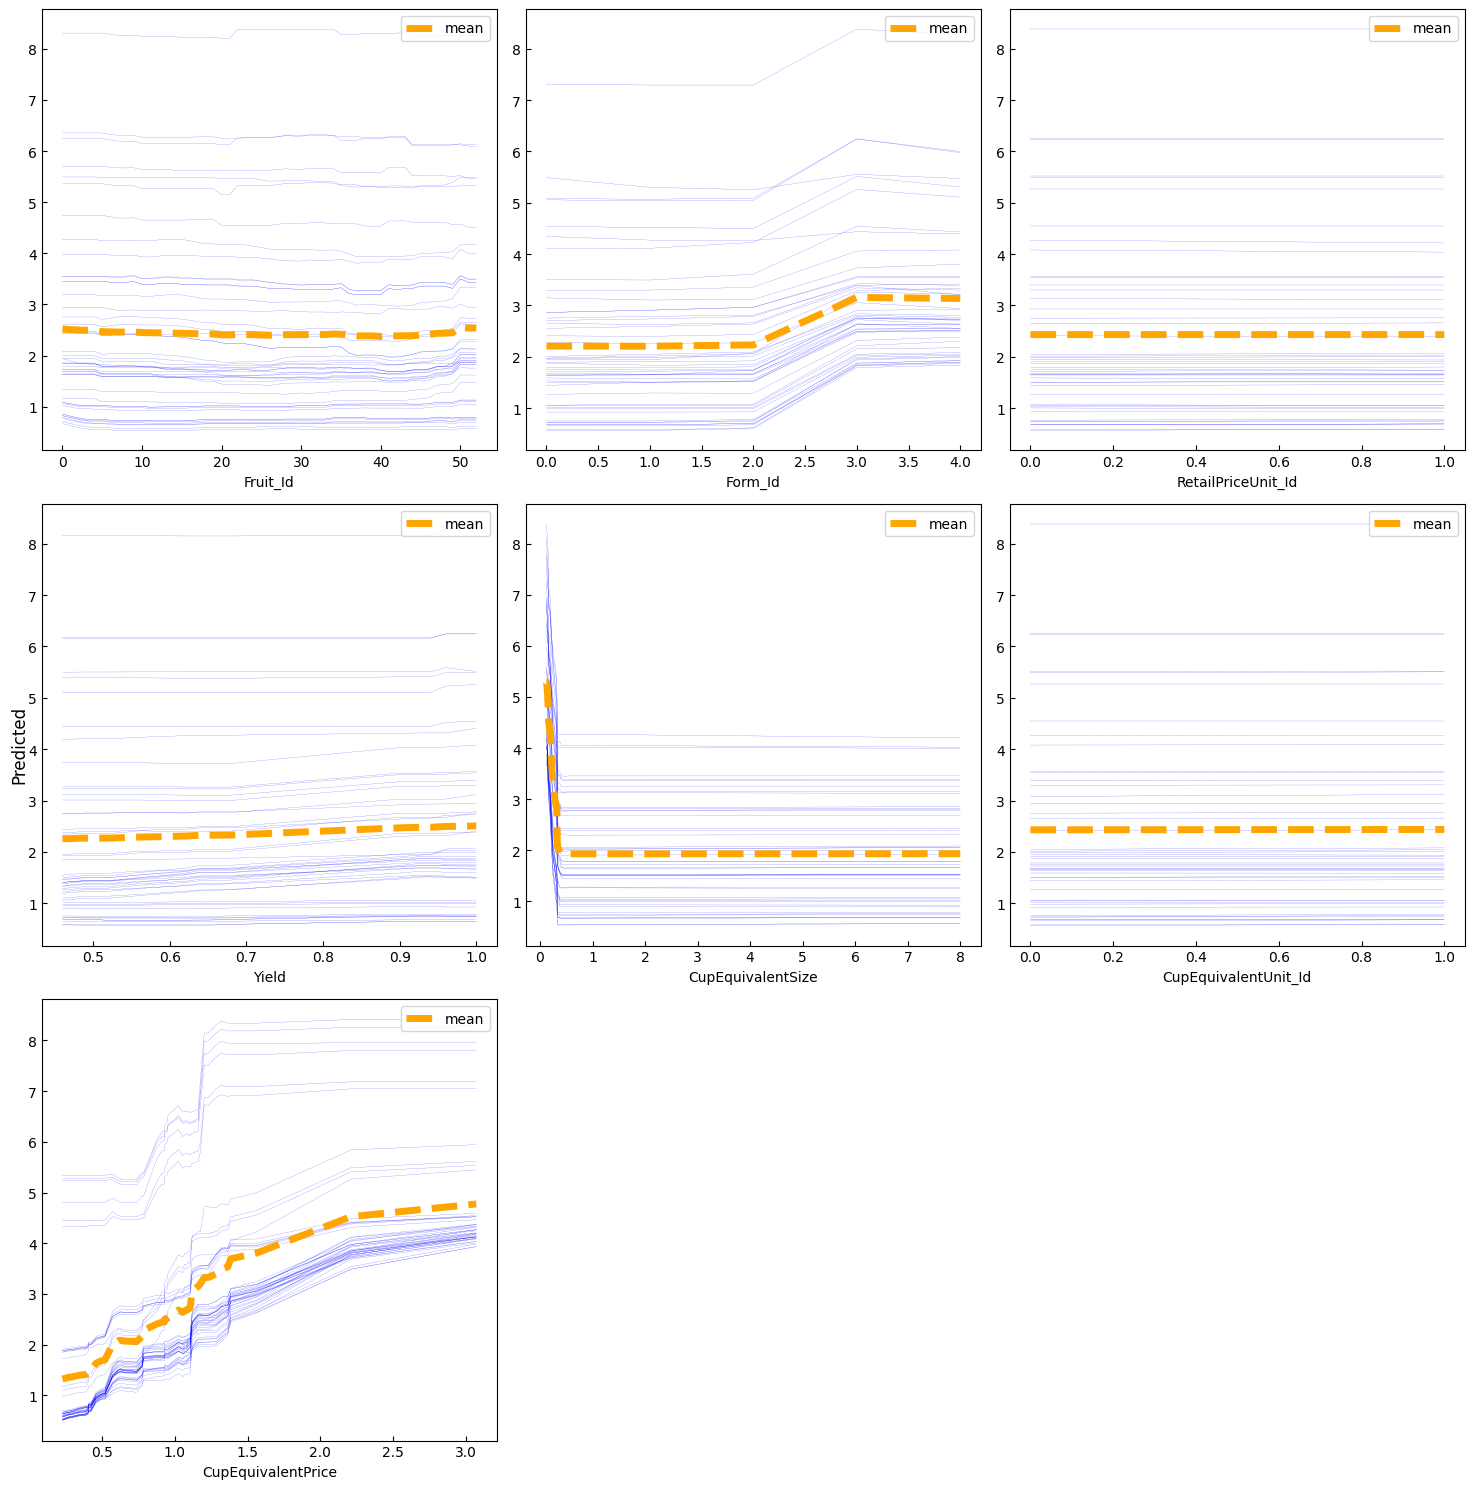

In [36]:
num_column = 3
num_row = int(len(X_train.columns) / num_column) + 1
column_data = list(X_train.columns)

fig, axes = plt.subplots(num_row, num_column, figsize=(15, 15))
for column, ax in zip_longest(column_data, axes.ravel()):
    if column is None:
        ax.axis('off')
        continue
    
    pd_and_ice = partial_dependence(forest, features=[column], percentiles=(0.05, 1-0.05), X=X_train, kind='individual')
    feature_grid = pd_and_ice['values'][0]
    pd_mean = pd_and_ice['individual'][0,:,:].mean(axis=0)
    pd_ind = np.squeeze(np.squeeze(pd_and_ice['individual']))
    
    for i in range(len(pd_ind)):
        ax.plot(feature_grid, pd_ind[i], color='blue', linewidth=0.1)
    ax.plot(feature_grid, pd_mean, label='mean', color='orange', linestyle = 'dashed', linewidth=5)
    ax.set_xlabel(column)
    ax.legend(loc='upper right') 

fig.supylabel('Predicted')      
fig.tight_layout()
fig.show()

#### SHapley Additive exPlanations (SHAP)

In [37]:
explainer = shap.Explainer(forest, X_test)
shap_values = explainer(X_test,check_additivity=False)

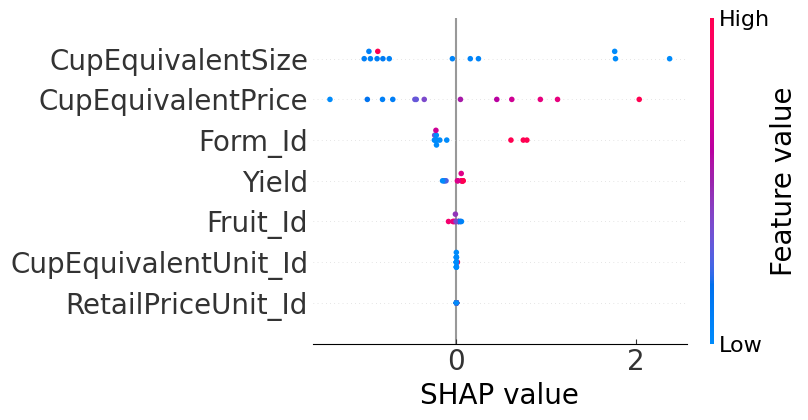

In [38]:
fig, ax = plt.gcf(), plt.gca()
shap.plots.beeswarm(shap_values, max_display=10, show=False)
ax.tick_params(labelsize=20)
ax.set_xlabel('SHAP value', fontsize=20)
cb_ax = fig.axes[1]
cb_ax.tick_params(labelsize=16)
cb_ax.set_ylabel('Feature value', fontsize=20)
fig.tight_layout()
fig.show()

## Summary
The code predicted the retail price of the fruits and vegetables in a random forest.   
It also visualized the variables' importance to clarify the model's behavior.  
The results showed that the CupEquivalentSize and CupEquivalentPrice were important in retail price prediction.  
If you find this code helpful, I would appreciate a star.  
Thank you for taking the time to look at this to the end.  